In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf
import os
import cv2
import warnings
warnings.filterwarnings('ignore')

In [2]:
def level_name(data_dir):
    output = {}
    class_name = os.listdir(data_dir)
    for level, class_name in enumerate(class_name):
        output[class_name] = level
    return output
train_level = level_name(r'D:\Human_Action_Recognition\data_human_actions\train')
test_level = level_name(r"D:\Human_Action_Recognition\data_human_actions\test")
print(train_level)
print(test_level)

{'calling': 0, 'drinking': 1, 'eating': 2, 'laughing': 3, 'sitting': 4, 'using_laptop': 5}
{'calling': 0, 'drinking': 1, 'eating': 2, 'laughing': 3, 'sitting': 4, 'using_laptop': 5}


In [3]:
def load_images(data_dir,img_size=(224,224)):
    output = {}
    X = []
    y = []
    class_name = os.listdir(data_dir)
    for level, class_name in enumerate(class_name):
        class_path = os.path.join(data_dir,class_name)
        
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path,img_name)
            
            img = plt.imread(img_path)
            
            if img is None:
                continue
            
            img = cv2.resize(img,img_size)
            img = img / 255.0
            
            X.append(img)
            y.append(level)
    img_array = np.array(X)
    level_array = np.array(y)
    level_name = os.listdir(data_dir)
    
    output['img'] = img_array
    output['level'] = level_array
    output['level_name'] = level_name
    
    return output

In [4]:
train_data = load_images(r'D:\Human_Action_Recognition\data_human_actions\train')
train_data

{'img': array([[[[0.85882353, 0.3372549 , 0.02745098],
          [0.83921569, 0.32156863, 0.01960784],
          [0.81176471, 0.30980392, 0.01568627],
          ...,
          [0.36078431, 0.35686275, 0.13333333],
          [0.39607843, 0.39607843, 0.17254902],
          [0.33333333, 0.3372549 , 0.11372549]],
 
         [[0.86666667, 0.34901961, 0.03529412],
          [0.83529412, 0.31764706, 0.01176471],
          [0.81960784, 0.32156863, 0.02352941],
          ...,
          [0.35686275, 0.35294118, 0.12941176],
          [0.42352941, 0.42352941, 0.2       ],
          [0.38431373, 0.38823529, 0.16470588]],
 
         [[0.8627451 , 0.34509804, 0.03137255],
          [0.84313725, 0.32941176, 0.01960784],
          [0.85098039, 0.35294118, 0.05098039],
          ...,
          [0.38823529, 0.38431373, 0.16078431],
          [0.45098039, 0.45098039, 0.22745098],
          [0.42352941, 0.42745098, 0.2       ]],
 
         ...,
 
         [[0.46666667, 0.42745098, 0.19215686],
          [

In [5]:
test_data = load_images(r'D:\Human_Action_Recognition\data_human_actions\test')
test_data

{'img': array([[[[0.98823529, 0.98823529, 0.98823529],
          [0.95686275, 0.95686275, 0.95686275],
          [0.97254902, 0.97254902, 0.97254902],
          ...,
          [0.39215686, 0.21176471, 0.11372549],
          [0.39215686, 0.21176471, 0.11764706],
          [0.39215686, 0.21176471, 0.11764706]],
 
         [[0.98823529, 0.98823529, 0.98823529],
          [0.96078431, 0.96078431, 0.96078431],
          [0.97647059, 0.97647059, 0.97647059],
          ...,
          [0.39215686, 0.21176471, 0.11372549],
          [0.39215686, 0.21176471, 0.11764706],
          [0.39215686, 0.21176471, 0.11764706]],
 
         [[0.98823529, 0.98823529, 0.98823529],
          [0.96470588, 0.96470588, 0.96470588],
          [0.98039216, 0.98039216, 0.98039216],
          ...,
          [0.39607843, 0.21568627, 0.11764706],
          [0.39215686, 0.21176471, 0.11764706],
          [0.39215686, 0.21176471, 0.11764706]],
 
         ...,
 
         [[0.40784314, 0.19607843, 0.05882353],
          [

In [42]:
def show_image(data_dir,start_number_of_image,end_number_of_image):
    count = 1
    level_name = os.listdir(data_dir)
    plt.figure(figsize=(15,15))
    for name in level_name:
        class_path = os.path.join(data_dir,name)
        img_name = os.listdir(class_path)
        for i,img_name_ in enumerate(img_name[start_number_of_image:end_number_of_image]):
            img_name_path = (os.path.join(class_path,img_name_))
            
            img_array = plt.imread(img_name_path)
            if img_array is None:
                continue
            
            img_array = cv2.resize(img_array,(224,224))
            plt.subplot(6,end_number_of_image-start_number_of_image,count)
            count = count+1
            plt.title(name)
            plt.imshow(img_array)
    plt.tight_layout(h_pad=2)
    plt.show()
            
        

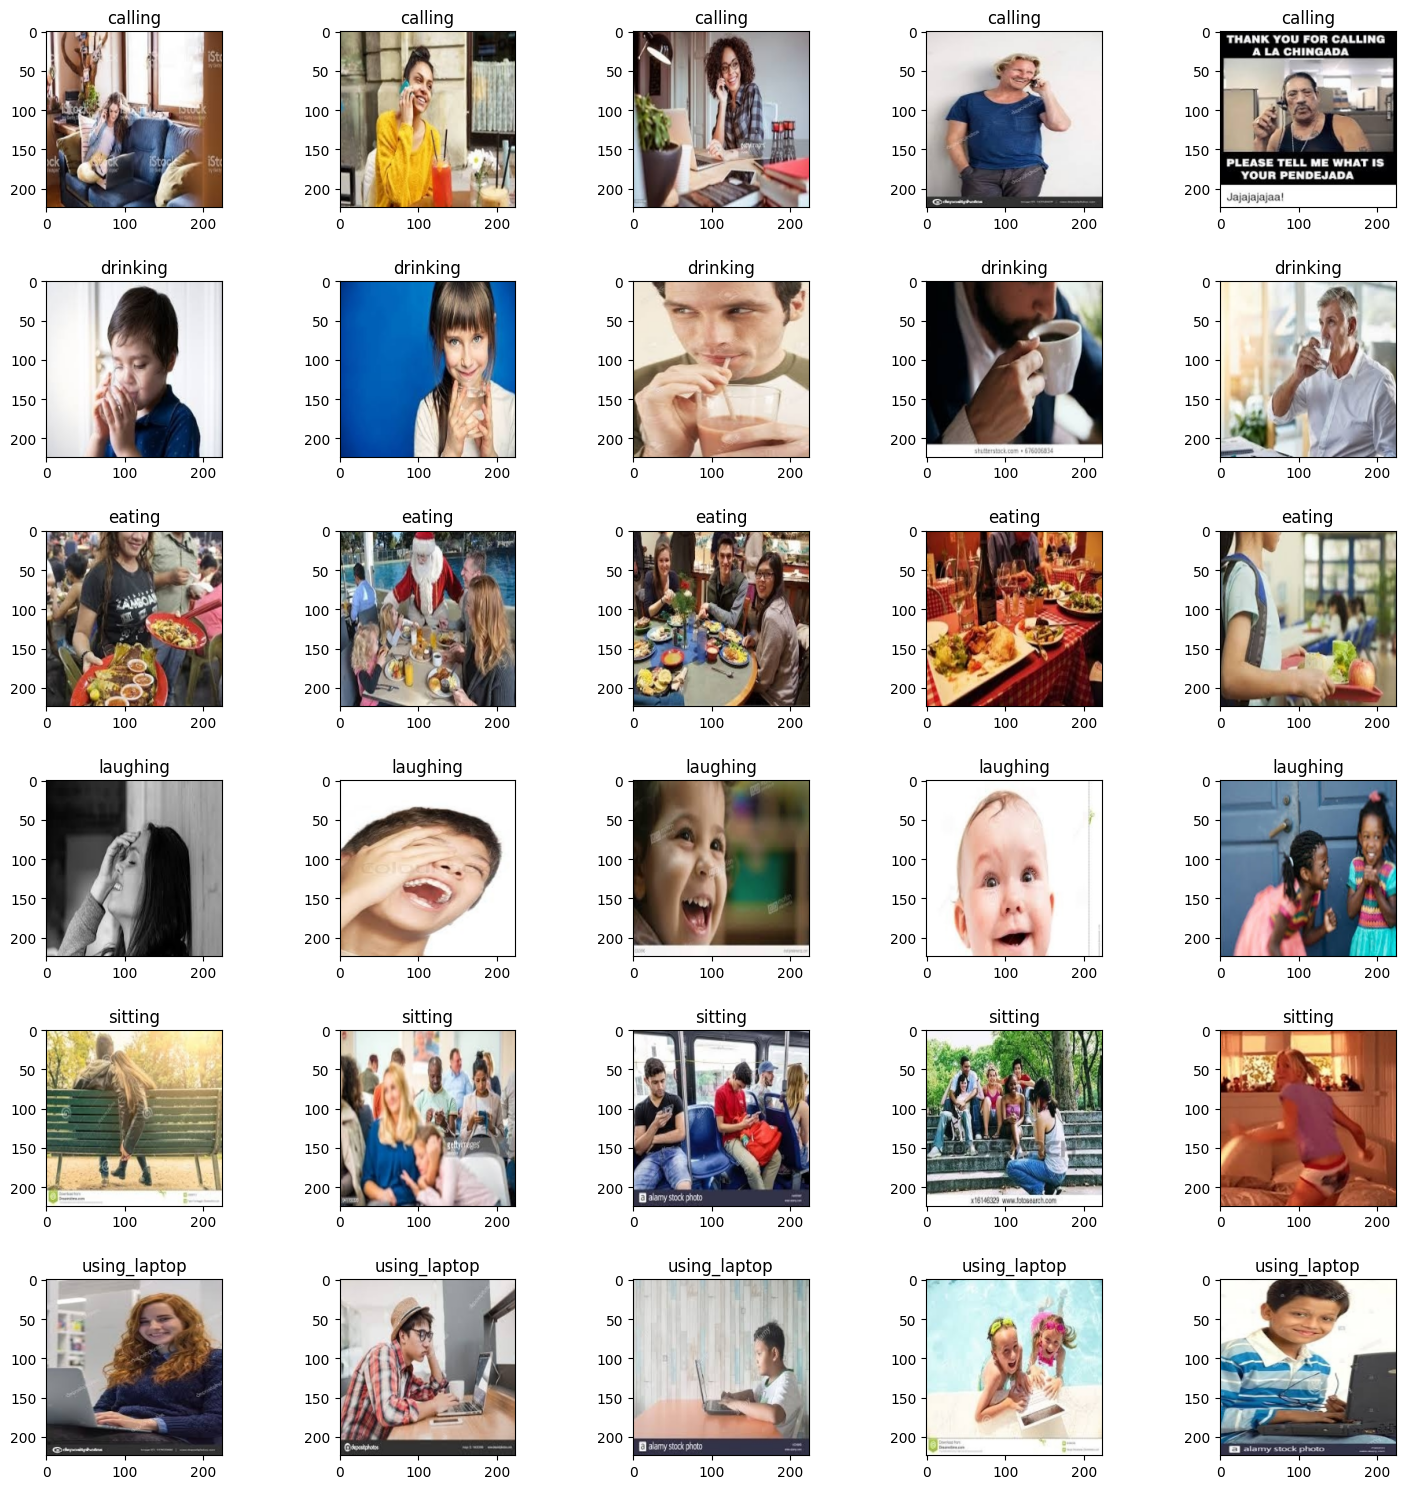

In [44]:
show_image(r'D:\Human_Action_Recognition\data_human_actions\test',0,5)